# Libraries

In [ ]:
import networkx as nx

import matplotlib.pyplot as plt

from osmgraph import OSMGraph
from multilayer import MultilayerNetwork

### Get the layers

We will instantiate three different objects of the class `OSMGraph` to represent the three layers of the network: the metro, the bus, and the tram layers.

In [39]:
subway = OSMGraph(location='Milan', kind='subway')
tram = OSMGraph(location='Milan', kind='tram')
bus = OSMGraph(location='Milan', kind='bus')

### Convert them to Graphs

We will convert the three layers to `networkx` graphs. We will iterate over the nodes and edges of the three layers and add them to the corresponding graph. The `simplify` parameter will be set to `True` to remove the parallel edges and merge together nodes that are close to each other as to have a compact representation of the network.

In [40]:
subway_graph = subway.get_graph(simplify=True, distance_threshold=150, verbose=True)
tram_graph = tram.get_graph(simplify=True, distance_threshold=100, verbose=True)
bus_graph = bus.get_graph(simplify=True, distance_threshold=50, verbose=True)

Found 125 clusters.


Merging nodes:   0%|          | 0/125 [00:00<?, ?it/s]

Merging nodes: 100%|██████████| 125/125 [00:00<00:00, 655.20it/s]

Merged 124 clusters into centroids.


Converting to Graph
Found 362 clusters.


Merging nodes: 100%|██████████| 362/362 [00:01<00:00, 239.14it/s]


Merged 298 clusters into centroids.
Converting to Graph
Found 2409 clusters.


Merging nodes: 100%|██████████| 2409/2409 [00:19<00:00, 123.85it/s]


Merged 669 clusters into centroids.
Converting to Graph


# Subway

Here we will analyze the subway layer of the network. We will do basic analysis of the subway network, such as the number of nodes and edges, the average degree, and the degree distribution. There will be also other measurements such as intersection count and edge total length.

Number of unique subway lines

In [6]:
subway.get_gdf(subway_graph)[0].line.unique()

array(['M1', 'M5', 'M2', 'M4', 'M3'], dtype=object)

Basic statistics of the subway network

In [7]:
subway.basic_stats()

{'n': 125,
 'm': 258,
 'k_avg': 4.128,
 'edge_length_total': np.float64(203311.2740000001),
 'edge_length_avg': np.float64(788.0281937984499),
 'streets_per_node_avg': 2.064,
 'streets_per_node_counts': {0: 0, 1: 13, 2: 100, 3: 3, 4: 9},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.104,
  2: 0.8,
  3: 0.024,
  4: 0.072},
 'intersection_count': 112,
 'street_length_total': np.float64(101655.63700000006),
 'street_segment_count': 129,
 'street_length_avg': np.float64(788.02819379845),
 'circuity_avg': np.float64(0.999999946557514),
 'self_loop_proportion': 0.0}

Get the diameter of the subway network

In [16]:
nx.diameter(subway_graph, weight='length')

np.float64(33061.88)

Get the density of the subway network

In [20]:
nx.density(subway_graph)

0.01664516129032258

In [ ]:
subway_measures = subway.network_summary()

In [ ]:
top5_degree_cent = subway.get_top_n_nodes(subway_measures, 'degree_centrality', n=5)
subway.get_node_names(top5_degree_cent)

['Lotto (M5) - https://www.google.com/maps/search/?api=1&query=45.479170849999996,9.144116499999999',
 'Cadorna FN (M2) - https://www.google.com/maps/search/?api=1&query=45.4681891,9.1767957',
 'Duomo (M1) - https://www.google.com/maps/search/?api=1&query=45.464356625,9.18899755',
 'San Babila (M1) - https://www.google.com/maps/search/?api=1&query=45.466319925,9.197611949999999',
 'Loreto (M2) - https://www.google.com/maps/search/?api=1&query=45.4847125,9.2158118']

In [ ]:
top5_betweenness_cent = subway.get_top_n_nodes(subway_measures, 'betweenness_centrality', n=5)
subway.get_node_names(top5_betweenness_cent)

['Cadorna FN (M2) - https://www.google.com/maps/search/?api=1&query=45.4681891,9.1767957',
 'Loreto (M2) - https://www.google.com/maps/search/?api=1&query=45.4847125,9.2158118',
 'Garibaldi FS (M5) - https://www.google.com/maps/search/?api=1&query=45.483502025,9.18721585',
 'Centrale FS (M3) - https://www.google.com/maps/search/?api=1&query=45.4846557,9.2029186',
 'Caiazzo (M2) - https://www.google.com/maps/search/?api=1&query=45.48530305,9.2094159']

In [ ]:
top5_closeness_cent = subway.get_top_n_nodes(subway_measures, 'closeness_centrality', n=5)
subway.get_node_names(top5_closeness_cent)

['Cadorna FN (M2) - https://www.google.com/maps/search/?api=1&query=45.4681891,9.1767957',
 'Cairoli (M1) - https://www.google.com/maps/search/?api=1&query=45.4687127,9.18171725',
 'Duomo (M1) - https://www.google.com/maps/search/?api=1&query=45.464356625,9.18899755',
 'Lanza (M2) - https://www.google.com/maps/search/?api=1&query=45.4717976,9.18231685',
 'Cordusio (M1) - https://www.google.com/maps/search/?api=1&query=45.46554985,9.18623135']

In [ ]:
top5_eigenvector_cent = subway.get_top_n_nodes(subway_measures, 'eigenvector_centrality', n=5)
subway.get_node_names(top5_eigenvector_cent)

['Famagosta (M2) - https://www.google.com/maps/search/?api=1&query=45.43688765,9.16812655',
 'Assago Milanofiori Nord (M2) - https://www.google.com/maps/search/?api=1&query=45.409451849999996,9.1500361',
 'Abbiategrasso-Chiesa Rossa (M2) - https://www.google.com/maps/search/?api=1&query=45.4300139,9.17732285',
 'Assago Milanofiori Forum (M2) - https://www.google.com/maps/search/?api=1&query=45.401806300000004,9.145574199999999',
 'Romolo (M2) - https://www.google.com/maps/search/?api=1&query=45.4437344,9.16770055']

In [ ]:
connectedness, compactness = subway.compute_connectedness(G=subway_graph, with_compactness=True)
small_worldness = subway.small_world_summary()

print(f'Connectedness: {connectedness}')
print(f'Compactness: {compactness}')
print(f'Small Worldness: {small_worldness}')

Computing connectedness:   0%|          | 0/7750 [00:00<?, ?it/s]

Computing connectedness: 100%|██████████| 7750/7750 [00:00<00:00, 14696.51it/s]

Connectedness: 0.5
Compactness: 0.0001252347733966199
Small Worldness: 0.17957220847905825


---

# Tram

Same as the subway layer, we will analyze the tram layer of the network. We will do basic analysis of the tram network, such as the number of nodes and edges, the average degree, and the degree distribution. There will be also other measurements such as intersection count and edge total length.

Number of unique tram lines

In [9]:
tram.get_gdf(tram_graph)[0].line.nunique()

17

Number of nodes and edges

In [10]:
tram.basic_stats()

{'n': 362,
 'm': 838,
 'k_avg': 4.629834254143646,
 'edge_length_total': np.float64(261255.624),
 'edge_length_avg': np.float64(311.7608878281623),
 'streets_per_node_avg': 2.314917127071823,
 'streets_per_node_counts': {0: 0, 1: 18, 2: 246, 3: 75, 4: 14, 5: 7, 6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.049723756906077346,
  2: 0.6795580110497238,
  3: 0.20718232044198895,
  4: 0.03867403314917127,
  5: 0.019337016574585635,
  6: 0.0055248618784530384},
 'intersection_count': 344,
 'street_length_total': np.float64(130627.81199999992),
 'street_segment_count': 419,
 'street_length_avg': np.float64(311.7608878281621),
 'circuity_avg': np.float64(1.000000028040939),
 'self_loop_proportion': 0.0}

Diameter of the tram network

In [17]:
nx.diameter(tram_graph, weight='length')

np.float64(23106.294000000005)

Density of the tram network

In [21]:
nx.density(tram_graph)

0.006412512817373471

In [ ]:
tram_measures = tram.network_summary()

In [ ]:
top5_degree_cent = tram.get_top_n_nodes(tram_measures, 'degree_centrality', n=5)
tram.get_node_names(top5_degree_cent)

['Largo Quinto Alpini (19) - https://www.google.com/maps/search/?api=1&query=45.47230925,9.16734915',
 'Via Farini Via Ferrari (4) - https://www.google.com/maps/search/?api=1&query=45.48549546,9.182390199999999',
 'P.le Cantore (14) - https://www.google.com/maps/search/?api=1&query=45.455159525,9.17239955',
 'Via Orefici - Piazza Cordusio (16) - https://www.google.com/maps/search/?api=1&query=45.463626,9.1877157',
 'Via Cusani (2) - https://www.google.com/maps/search/?api=1&query=45.469164625,9.184981400000002']

In [ ]:
top5_betweenness_cent = tram.get_top_n_nodes(tram_measures, 'betweenness_centrality', n=5)
tram.get_node_names(top5_betweenness_cent)

['Via Orefici - Piazza Cordusio (16) - https://www.google.com/maps/search/?api=1&query=45.463626,9.1877157',
 'Via Farini Via Ferrari (4) - https://www.google.com/maps/search/?api=1&query=45.48549546,9.182390199999999',
 'Piazza Cinque Giornate (9) - https://www.google.com/maps/search/?api=1&query=45.46216862,9.20778846',
 'P.le Cim. Monumentale Via Bramante (14) - https://www.google.com/maps/search/?api=1&query=45.483999850000004,9.177993824999998',
 'Viale Vittorio Veneto (9) - https://www.google.com/maps/search/?api=1&query=45.47669666666667,9.2009296']

In [ ]:
top5_closeness_cent = tram.get_top_n_nodes(tram_measures, 'closeness_centrality', n=5)
tram.get_node_names(top5_closeness_cent)

['Cordusio M1 (16) - https://www.google.com/maps/search/?api=1&query=45.46578636666667,9.185941299999998',
 'Via Orefici - Piazza Cordusio (16) - https://www.google.com/maps/search/?api=1&query=45.463626,9.1877157',
 'Via Grossi (1) - https://www.google.com/maps/search/?api=1&query=45.465616049999994,9.1874591',
 'Via Cusani (2) - https://www.google.com/maps/search/?api=1&query=45.469164625,9.184981400000002',
 'Teatro alla Scala (1) - https://www.google.com/maps/search/?api=1&query=45.4663694,9.1888226']

In [ ]:
top5_eigenvector_cent = tram.get_top_n_nodes(tram_measures, 'eigenvector_centrality', n=5)
tram.get_node_names(top5_eigenvector_cent)

['Via Cusani (2) - https://www.google.com/maps/search/?api=1&query=45.469164625,9.184981400000002',
 'Via Orefici - Piazza Cordusio (16) - https://www.google.com/maps/search/?api=1&query=45.463626,9.1877157',
 'Cordusio M1 (16) - https://www.google.com/maps/search/?api=1&query=45.46578636666667,9.185941299999998',
 'Lanza M2 (14) - https://www.google.com/maps/search/?api=1&query=45.4720882,9.1820555',
 'Missori M3 (24) - https://www.google.com/maps/search/?api=1&query=45.460105750000004,9.188424375']

In [ ]:
connectedness, compactness = tram.compute_connectedness(G=tram_graph, with_compactness=True)
small_worldness = tram.small_world_summary()

print(f'Connectedness: {connectedness}')
print(f'Compactness: {compactness}')
print(f'Small Worldness: {small_worldness}')

Computing connectedness: 100%|██████████| 65341/65341 [00:05<00:00, 11323.46it/s]


Connectedness: 0.5
Compactness: 0.00016596117202965862
Small Worldness: -8.683468971320552


---

# Bus

Same as the subway and tram layers, we will analyze the bus layer of the network. We will do basic analysis of the bus network, such as the number of nodes and edges, the average degree, and the degree distribution. There will be also other measurements such as intersection count and edge total length.

Number of unique bus lines

In [11]:
bus.get_gdf(bus_graph)[0].line.nunique()

113

Number of nodes and edges

In [12]:
bus.basic_stats()

{'n': 2406,
 'm': 6396,
 'k_avg': 5.316708229426434,
 'edge_length_total': np.float64(2374945.4279999966),
 'edge_length_avg': np.float64(371.3172964352715),
 'streets_per_node_avg': 2.658354114713217,
 'streets_per_node_counts': {0: 6,
  1: 31,
  2: 1509,
  3: 433,
  4: 256,
  5: 93,
  6: 34,
  7: 22,
  8: 11,
  9: 5,
  10: 2,
  11: 2,
  12: 0,
  13: 2},
 'streets_per_node_proportions': {0: 0.0024937655860349127,
  1: 0.012884455527847049,
  2: 0.6271820448877805,
  3: 0.17996674979218621,
  4: 0.10640066500415628,
  5: 0.03865336658354115,
  6: 0.014131338320864505,
  7: 0.00914380714879468,
  8: 0.00457190357439734,
  9: 0.0020781379883624274,
  10: 0.0008312551953449709,
  11: 0.0008312551953449709,
  12: 0.0,
  13: 0.0008312551953449709},
 'intersection_count': 2369,
 'street_length_total': np.float64(1187472.7140000057),
 'street_segment_count': 3198,
 'street_length_avg': np.float64(371.3172964352738),
 'circuity_avg': np.float64(0.999999997712918),
 'self_loop_proportion': 0.0}

Density of the bus network

In [22]:
nx.density(bus_graph)

0.001105344746242502

In [31]:
bus_measures = bus.network_summary()

In [32]:
top5_degree_cent = bus.get_top_n_nodes(bus_measures, 'degree_centrality', n=5)
bus.get_node_names(top5_degree_cent)

['Bisceglie M1 (76) - https://www.google.com/maps/search/?api=1&query=45.45517243636364,9.112761181818183',
 'Comasina M3 (729) - https://www.google.com/maps/search/?api=1&query=45.52823595,9.1634961',
 'Stazione Lambrate M2 (81) - https://www.google.com/maps/search/?api=1&query=45.48457426666667,9.236320366666666',
 'Stazione Forlanini M4 (N27) - https://www.google.com/maps/search/?api=1&query=45.46206086666667,9.235832933333333',
 'Affori FN M3 (41/) - https://www.google.com/maps/search/?api=1&query=45.5201315,9.169605650000001']

In [33]:
top5_betweenness_cent = bus.get_top_n_nodes(bus_measures, 'betweenness_centrality', n=5)
bus.get_node_names(top5_betweenness_cent)

['Largo Augusto (NM4) - https://www.google.com/maps/search/?api=1&query=45.46267373333333,9.1981629',
 'Via San Damiano - Corso Monforte (85) - https://www.google.com/maps/search/?api=1&query=45.4664646,9.2004699',
 'Stazione Centrale M2 M3 (42) - https://www.google.com/maps/search/?api=1&query=45.48658240000001,9.20221898',
 'Santa Sofia M4 (NM4) - https://www.google.com/maps/search/?api=1&query=45.456012425,9.187184025',
 'Piazza Cavour (NM3) - https://www.google.com/maps/search/?api=1&query=45.4718547,9.19566815']

In [34]:
top5_closeness_cent = bus.get_top_n_nodes(bus_measures, 'closeness_centrality', n=5)
bus.get_node_names(top5_closeness_cent)

['Largo Augusto (NM4) - https://www.google.com/maps/search/?api=1&query=45.46267373333333,9.1981629',
 'Duomo M1 M3 (NM3) - https://www.google.com/maps/search/?api=1&query=45.46226693333333,9.190292133333333',
 'Largo Augusto (N27) - https://www.google.com/maps/search/?api=1&query=45.463864,9.196488',
 'Via Visconti di Modrone (85) - https://www.google.com/maps/search/?api=1&query=45.46502995,9.2001342',
 'Via San Damiano - Corso Monforte (85) - https://www.google.com/maps/search/?api=1&query=45.4664646,9.2004699']

In [35]:
top5_eigenvector_cent = bus.get_top_n_nodes(bus_measures, 'eigenvector_centrality', n=5)
bus.get_node_names(top5_eigenvector_cent)

['Sesto San Giovanni FS - MM1 - 1 Maggio (700) - https://www.google.com/maps/search/?api=1&query=45.54199637999999,9.23909606',
 'Via Zucchi - Via Italia (Cusano Milanino) (727) - https://www.google.com/maps/search/?api=1&query=45.5489366,9.1755787',
 'Via Monfalcone - Via Manzoni (Cinisello Balsamo) (729) - https://www.google.com/maps/search/?api=1&query=45.550948,9.2140553',
 'Sesto Rondò M1 (NM1) - https://www.google.com/maps/search/?api=1&query=45.5342152,9.2311298',
 'Sesto Rondò M1 (NM1) - https://www.google.com/maps/search/?api=1&query=45.5343872,9.2316135']

In [19]:
bus_cc = bus_graph.subgraph(sorted(nx.connected_components(bus_graph), key=len, reverse=True)[0])
nx.diameter(bus_cc, weight='length')

np.float64(39584.402)

In [ ]:
connectedness, compactness = bus.compute_connectedness(G = bus_graph, with_compactness=True)
small_worldness = bus.small_world_summary()

print(f'Connectedness: {connectedness}')
print(f'Compactness: {compactness}')
print(f'Small Worldness: {small_worldness}')

In [13]:
small_worldness = bus.small_world_summary()
print(f'Small Worldness: {small_worldness}')

Small Worldness: -45.735241099049844


---

# Multilayer (interconnected) Network

Create a multilayer network with subway and tram lines and compare the average shortest path length of the isolated layers with the average shortest path length of the interconnected network.

In [ ]:
mln = MultilayerNetwork()

mln.add_layer(layer_name='subway', layer_graph=subway_graph)
mln.add_layer(layer_name='tram', layer_graph=tram_graph)

mln.spatial_join('subway', 'tram', distance_threshold=100)

mln.summary()

Layer subway added.
Layer tram added.
Added 30 transfer edges between subway and tram.
layer           	nodes 	edges
----------------------------------------
subway           	 125 	 129
tram             	 361 	 418
subway--tram     	 0 	 30


In [ ]:
layer_apl, multilayer_apl = mln.compare_apl(layer_name='subway', verbose=False)
print(f'Layer APL: {layer_apl}')
print(f'Multilayer APL: {multilayer_apl}')

layer_apl, multilayer_apl = mln.compare_apl(layer_name='tram', verbose=False)
print(f'Layer APL: {layer_apl}')
print(f'Multilayer APL: {multilayer_apl}')

Layer APL: 8906.701000645291
Multilayer APL: 8692.504935549892
Layer APL: 6214.117938119498
Multilayer APL: 6111.248982861519


Create a multilayer network with subway and bus lines and compare the average shortest path length of the isolated layers with the average shortest path length of the interconnected network.

In [ ]:
mln = MultilayerNetwork()

mln.add_layer(layer_name='subway', layer_graph=subway_graph)
mln.add_layer(layer_name='bus', layer_graph=bus_graph)

mln.spatial_join('subway', 'bus', distance_threshold=100)

mln.summary()

Layer subway added.
Layer bus added.
Added 144 transfer edges between subway and bus.
layer           	nodes 	edges
----------------------------------------
subway           	 125 	 129
bus              	 2398 	 3184
subway--bus      	 0 	 144


In [ ]:
layer_apl, multilayer_apl = mln.compare_apl(layer_name='subway', verbose=False)
print(f'Layer APL: {layer_apl}')
print(f'Multilayer APL: {multilayer_apl}')

layer_apl, multilayer_apl = mln.compare_apl(layer_name='bus', verbose=False)
print(f'Layer APL: {layer_apl}')
print(f'Multilayer APL: {multilayer_apl}')

Layer APL: 8906.701000645291
Multilayer APL: 8199.541172446257
Layer APL: 10985.525033292744
Multilayer APL: 10596.024241308836


Here we will analyze the multilayer network with all the three layers: subway, tram, and bus. We will do basic analysis of the multilayer network, such as the number of nodes and edges, the average degree, and the degree distribution. The inter-layer edges will be added to the multilayer network by using a spatial proximity criterion based on the distance between the nodes of the different layers.

In [41]:
M = MultilayerNetwork()
M.add_layer(layer_name='subway', layer_graph=subway_graph)
M.add_layer(layer_name='tram', layer_graph=tram_graph)
M.add_layer(layer_name='bus', layer_graph=bus_graph)

M.spatial_join('subway', 'tram', distance_threshold=100)
M.spatial_join('subway', 'bus', distance_threshold=100)
M.spatial_join('tram', 'bus', distance_threshold=100)

M.summary()

Layer subway added.
Layer tram added.
Layer bus added.
Added 30 transfer edges between subway and tram.
Added 149 transfer edges between subway and bus.
Added 343 transfer edges between tram and bus.
layer           	nodes 	edges
----------------------------------------
subway           	 125 	 130
tram             	 362 	 419
bus              	 2409 	 3201
subway--tram     	 0 	 30
subway--bus      	 0 	 149
tram--bus        	 0 	 343


Then we compare the average shortest path length of the interconnected network with the average shortest path length of the isolated layers.

In [ ]:
# Subway 
subway_apl = nx.average_shortest_path_length(subway_graph, weight='length')

# Tram
tram_apl = nx.average_shortest_path_length(tram_graph, weight='length')

# Bus
bus_cc = bus_graph.subgraph(sorted(nx.connected_components(bus_graph), key=len, reverse=True)[0])
bus_apl = nx.average_shortest_path_length(bus_cc, weight='length')

# Multilayer
net_cc = M.G.subgraph(sorted(nx.connected_components(M.G), key=len, reverse=True)[0])
multi_apl = nx.average_shortest_path_length(net_cc, weight='length')
multi_diameter = nx.diameter(net_cc, weight='length')

print(f'Subway APL: {subway_apl}\tNodes: {subway_graph.number_of_nodes()}')
print(f'Tram APL: {tram_apl}\tNodes: {tram_graph.number_of_nodes()}')
print(f'Bus APL: {bus_apl}\tNodes: {bus_cc.number_of_nodes()}')
print(f'Multilayer APL: {multi_apl}\tNodes: {net_cc.number_of_nodes()}')

In [11]:
print(f'Multilayer Diameter: {multi_diameter}')

Multilayer Diameter: 37995.20242519551


Compare the global clustering coefficient of the interconnected network with the global clustering coefficient of the isolated layers.

In [143]:
# Subway
subway_cluster_coeff = nx.average_clustering(subway_graph)

# Tram
tram_cluster_coeff = nx.average_clustering(tram_graph)

# Bus
bus_cluster_coeff = nx.average_clustering(bus_graph)

# Multilayer
multi_cluster_coeff = nx.average_clustering(M.G)

print(f'Subway Cluster Coefficient: {subway_cluster_coeff}')
print(f'Tram Cluster Coefficient: {tram_cluster_coeff}')
print(f'Bus Cluster Coefficient: {bus_cluster_coeff}')
print(f'Multilayer Cluster Coefficient: {multi_cluster_coeff}')

Subway Cluster Coefficient: 0.0
Tram Cluster Coefficient: 0.04852670349907919
Bus Cluster Coefficient: 0.04761526751535076
Multilayer Cluster Coefficient: 0.04678171334453784


And here we will perform the same measurements as above but for the interconnected network with all the three layers: subway, tram, and bus.

In [14]:
M_measures = M.network_summary()

In [25]:
top5_degree_cent = M.get_top_n_nodes(M_measures, 'degree_centrality', n=5)
M.get_node_names(top5_degree_cent)

['Bisceglie M1 (76) - https://www.google.com/maps/search/?api=1&query=45.45517243636364,9.112761181818183',
 'Comasina M3 (729) - https://www.google.com/maps/search/?api=1&query=45.52823595,9.1634961',
 'Stazione Lambrate M2 (81) - https://www.google.com/maps/search/?api=1&query=45.48457426666667,9.236320366666666',
 'Stazione Forlanini M4 (N27) - https://www.google.com/maps/search/?api=1&query=45.46206086666667,9.235832933333333',
 'Largo Augusto (NM4) - https://www.google.com/maps/search/?api=1&query=45.46267373333333,9.1981629']

In [16]:
top5_betweenness_cent = M.get_top_n_nodes(M_measures, 'betweenness_centrality')
M.get_node_names(top5_betweenness_cent)

['Duomo M1 M3 (NM3) - https://www.google.com/maps/search/?api=1&query=45.46226693333333,9.190292133333333',
 'Cadorna FN (M2) - https://www.google.com/maps/search/?api=1&query=45.4681891,9.1767957',
 'Via Orefici - Piazza Cordusio (16) - https://www.google.com/maps/search/?api=1&query=45.463626,9.1877157',
 'Lanza (M2) - https://www.google.com/maps/search/?api=1&query=45.4717976,9.18231685',
 'Lanza M2 (14) - https://www.google.com/maps/search/?api=1&query=45.4720882,9.1820555',
 'Garibaldi FS (M5) - https://www.google.com/maps/search/?api=1&query=45.483502025,9.18721585',
 'Porta Lodovica (9) - https://www.google.com/maps/search/?api=1&query=45.451524825,9.186809125',
 'Via Farini Via Ferrari (4) - https://www.google.com/maps/search/?api=1&query=45.48549546,9.182390199999999',
 'Loreto M1 M2 (55/) - https://www.google.com/maps/search/?api=1&query=45.484185350000004,9.2159412',
 'Sforza - Policlinico M4 (NM4) - https://www.google.com/maps/search/?api=1&query=45.457599450000004,9.193070

In [26]:
M.centrality_heatmap(centrality_measure=top5_betweenness_cent)

In [18]:
top5_closeness_cent = M.get_top_n_nodes(M_measures, 'closeness_centrality')
M.get_node_names(top5_closeness_cent)

['Cordusio M1 (NM1) - https://www.google.com/maps/search/?api=1&query=45.465574950000004,9.1858052',
 'Cordusio M1 (16) - https://www.google.com/maps/search/?api=1&query=45.46578636666667,9.185941299999998',
 'Cordusio (M1) - https://www.google.com/maps/search/?api=1&query=45.46554985,9.18623135',
 'Via Orefici - Piazza Cordusio (16) - https://www.google.com/maps/search/?api=1&query=45.463626,9.1877157',
 'Duomo M1 M3 (NM1) - https://www.google.com/maps/search/?api=1&query=45.464371150000005,9.18736175',
 'Cairoli (M1) - https://www.google.com/maps/search/?api=1&query=45.4687127,9.18171725',
 'Via Cusani (2) - https://www.google.com/maps/search/?api=1&query=45.469164625,9.184981400000002',
 'Duomo M1 M3 (NM1) - https://www.google.com/maps/search/?api=1&query=45.4632051,9.1885178',
 'Lanza (M2) - https://www.google.com/maps/search/?api=1&query=45.4717976,9.18231685',
 'Lanza M2 (14) - https://www.google.com/maps/search/?api=1&query=45.4720882,9.1820555',
 'Via Cusani (85) - https://www.

In [27]:
M.centrality_heatmap(centrality_measure=top5_closeness_cent)

In [125]:
top5_eigenvector_cent = M.get_top_n_nodes(M_measures, 'eigenvector_centrality', n=5)
M.get_node_names(top5_eigenvector_cent)

['Sesto San Giovanni FS - MM1 - 1 Maggio (700) - https://www.google.com/maps/search/?api=1&query=45.54199637999999,9.23909606',
 'Via Zucchi - Via Italia (Cusano Milanino) (727) - https://www.google.com/maps/search/?api=1&query=45.5489366,9.1755787',
 'Via Monfalcone - Via Manzoni (Cinisello Balsamo) (729) - https://www.google.com/maps/search/?api=1&query=45.550948,9.2140553',
 'Sesto Rondò M1 (NM1) - https://www.google.com/maps/search/?api=1&query=45.5342152,9.2311298',
 'Sesto Rondò M1 (NM1) - https://www.google.com/maps/search/?api=1&query=45.5343872,9.2316135']

In [ ]:
connectedness, compactness = M.compute_connectedness(G=M.G, with_compactness=True)

In [127]:
print(f'Connectedness: {connectedness}')
print(f'Compactness: {compactness}')

Connectedness: 0.4944815275057075
Compactness: 0.0001092530356794263


In [137]:
small_worldness = M.small_world_summary()
print(f'Small Worldness: {small_worldness}')

Small Worldness: -270.3045389364909


---

# What-if Analysis (Robustness)

In this section, we will analyze the robustness of the multilayer network with all the three layers: subway, tram, and bus. We will analyze the robustness of the network by removing nodes and edges from the network and measuring the change according to the connectedness of the network. The connectedness of the network is a measure of cohesion defined as the proportion of pairs of nodes that can reach each other by a path of any length. The typical usage of connectedness is in evaluating changes to a network either in reality or as part of a what-if simulation.

In [ ]:
random_rn_subway, random_connectedness_subway = subway.dismantle(subway.random_node)
random_rn_tram, random_connectedness_tram = tram.dismantle(tram.random_node)
random_rn_bus, random_connectedness_bus = bus.dismantle(bus.random_node)
random_rn_multi, random_connectedness_multi = M.dismantle(M.random_node)

In [ ]:
degree_rn_subway, degree_connectedness_subway = subway.dismantle(subway.get_sorted_nodes, score=nx.degree, weight='length')
degree_rn_tram, degree_connectedness_tram = tram.dismantle(tram.get_sorted_nodes, score=nx.degree, weight='length')
degree_rn_bus, degree_connectedness_bus = bus.dismantle(bus.get_sorted_nodes, score=nx.degree, weight='length')
degree_rn_multi, degree_connectedness_multi = M.dismantle(M.get_sorted_nodes, score=nx.degree, weight='length')

In [ ]:
betweenness_rn_subway, betweenness_connectedness_subway = subway.dismantle(subway.get_sorted_nodes, score=nx.betweenness_centrality, weight='length')
betweenness_rn_tram, betweenness_connectedness_tram = tram.dismantle(tram.get_sorted_nodes, score=nx.betweenness_centrality, weight='length')
betweenness_rn_bus, betweenness_connectedness_bus = bus.dismantle(bus.get_sorted_nodes, score=nx.betweenness_centrality, weight='length')
betweenness_rn_multi, betweenness_connectedness_multi = M.dismantle(M.get_sorted_nodes, score=nx.betweenness_centrality, weight='length')

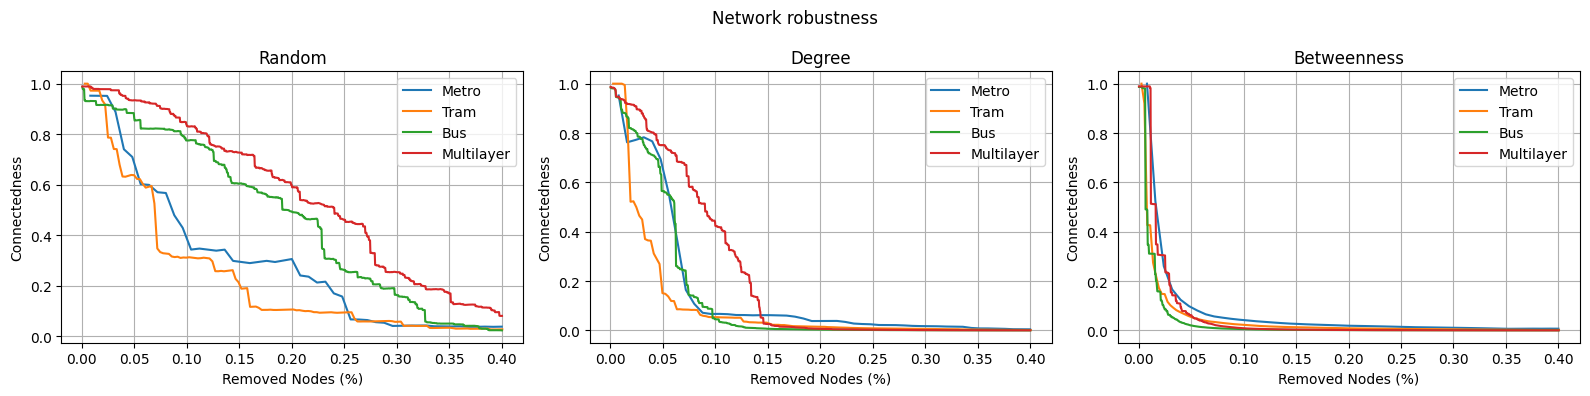

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.suptitle('Network robustness')
plt.title('Random')
plt.plot(random_rn_subway, random_connectedness_subway, label='Metro')
plt.plot(random_rn_tram, random_connectedness_tram, label='Tram')
plt.plot(random_rn_bus, random_connectedness_bus, label='Bus')
plt.plot(random_rn_multi, random_connectedness_multi, label='Multilayer')
plt.xlabel('Removed Nodes (%)')
plt.ylabel('Connectedness')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.title('Degree')
plt.plot(degree_rn_subway, degree_connectedness_subway, label='Metro')
plt.plot(degree_rn_tram, degree_connectedness_tram, label='Tram')
plt.plot(degree_rn_bus, degree_connectedness_bus, label='Bus')
plt.plot(degree_rn_multi, degree_connectedness_multi, label='Multilayer')
plt.xlabel('Removed Nodes (%)')
plt.ylabel('Connectedness')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.title('Betweenness')
plt.plot(betweenness_rn_subway, betweenness_connectedness_subway, label='Metro')
plt.plot(betweenness_rn_tram, betweenness_connectedness_tram, label='Tram')
plt.plot(betweenness_rn_bus, betweenness_connectedness_bus, label='Bus')
plt.plot(betweenness_rn_multi, betweenness_connectedness_multi, label='Multilayer')
plt.xlabel('Removed Nodes (%)')
plt.ylabel('Connectedness')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()